In [134]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline

In [136]:
# Load the data using Pandas
df = pd.read_csv('job-market.csv')
df.dropna(how="all",inplace=True)

#TODO: Visualize the top 10 first Rows
df.head(10)

Id                                              Title  \
0      37404348.0                           Casual Stock Replenisher   
1      37404337.0                           Casual Stock Replenisher   
2      37404356.0  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3      37404330.0                              Team member - Belrose   
4      37404308.0  Business Banking Contact Centre Specialist, Ni...   
...           ...                                                ...   
10094  37388912.0                                Executive Assistant   
10095  37388903.0                   Payroll Officer - Neller Preceda   
10096  37388901.0                       Receptionist / Administrator   
10097  37388898.0          INTERNATIONAL WHOLESALE TRAVEL CONSULTANT   
10098  37388893.0                    Customer Service Representative   

                                              Company  \
0                                         Aldi Stores   
1                                         Aldi Stores   
2                                 LB Creative Pty Ltd   
3                              Anaconda Group Pty Ltd   
4      Commonwealth Bank - Business & Private Banking   
...                                               ...   
10094                              V/Line Corporation   
10095                      Hays Accountancy & Finance   
10096                     Randstad - Business Support   
10097                        AA Appointments Brisbane   
10098                                    Kennedy Reid   

                           Date                 Location  \
0      2018-10-07T00:00:00.000Z                   Sydney   
1      2018-10-07T00:00:00.000Z    Richmond & Hawkesbury   
2      2018-10-07T00:00:00.000Z                 Brisbane   
3      2018-10-07T00:00:00.000Z  Gosford & Central Coast   
4      2018-10-07T00:00:00.000Z                   Sydney   
...                         ...                      ...   
10094  2018-10-04T00:00:00.000Z                Melbourne   
10095  2018-10-04T00:00:00.000Z                Melbourne   
10096  2018-10-04T00:00:00.000Z                 Brisbane   
10097  2018-10-04T00:00:00.000Z                 Brisbane   
10098  2018-10-04T00:00:00.000Z                   Sydney   

                              Area                   Classification  \
0      North West & Hills District       Retail & Consumer Products   
1                              NaN       Retail & Consumer Products   
2              CBD & Inner Suburbs       Retail & Consumer Products   
3                              NaN       Retail & Consumer Products   
4            Ryde & Macquarie Park   Call Centre & Customer Service   
...                            ...                              ...   
10094          CBD & Inner Suburbs  Administration & Office Support   
10095          CBD & Inner Suburbs                       Accounting   
10096          CBD & Inner Suburbs  Administration & Office Support   
10097          CBD & Inner Suburbs            Hospitality & Tourism   
10098     South West & M5 Corridor   Call Centre & Customer Service   

               SubClassification  \
0              Retail Assistants   
1              Retail Assistants   
2              Retail Assistants   
3              Retail Assistants   
4                Sales - Inbound   
...                          ...   
10094       PA, EA & Secretarial   
10095                    Payroll   
10096  Administrative Assistants   
10097  Travel Agents/Consultants   
10098                      Other   

                                             Requirement  \
0      Our Casual Stock Replenishers pride themselves...   
1      Our Casual Stock Replenishers pride themselves...   
2      BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA   
3      Bring it on - do you love the great outdoors a...   
4      We are seeking highly articulate, enthusiastic...   
...                                                  ...   
10094  The Executive Assistant will pr

In [137]:
classification_totals = pd.DataFrame(df.Classification.value_counts(dropna=True))
classification_totals

Classification
Hospitality & Tourism                             1585
Trades & Services                                 1225
Manufacturing, Transport & Logistics               990
Retail & Consumer Products                         896
Administration & Office Support                    746
Healthcare & Medical                               622
Information & Communication Technology             411
Education & Training                               401
Sales                                              389
Accounting                                         378
Call Centre & Customer Service                     342
Construction                                       265
Community Services & Development                   258
Real Estate & Property                             228
Government & Defence                               203
Mining, Resources & Energy                         176
Banking & Financial Services                       153
Marketing & Communications                         139
Human Resources & Recruitment                      138
Engineering                                        126
Legal                                               94
Design & Architecture                               69
Sport & Recreation                                  61
Farming, Animals & Conservation                     56
Advertising, Arts & Media                           45
Insurance & Superannuation                          45
Science & Technology                                22
CEO & General Management                            17
Consulting & Strategy                               14
Self Employment                                      5

Text(0.5, 1.0, 'Classification of workers')

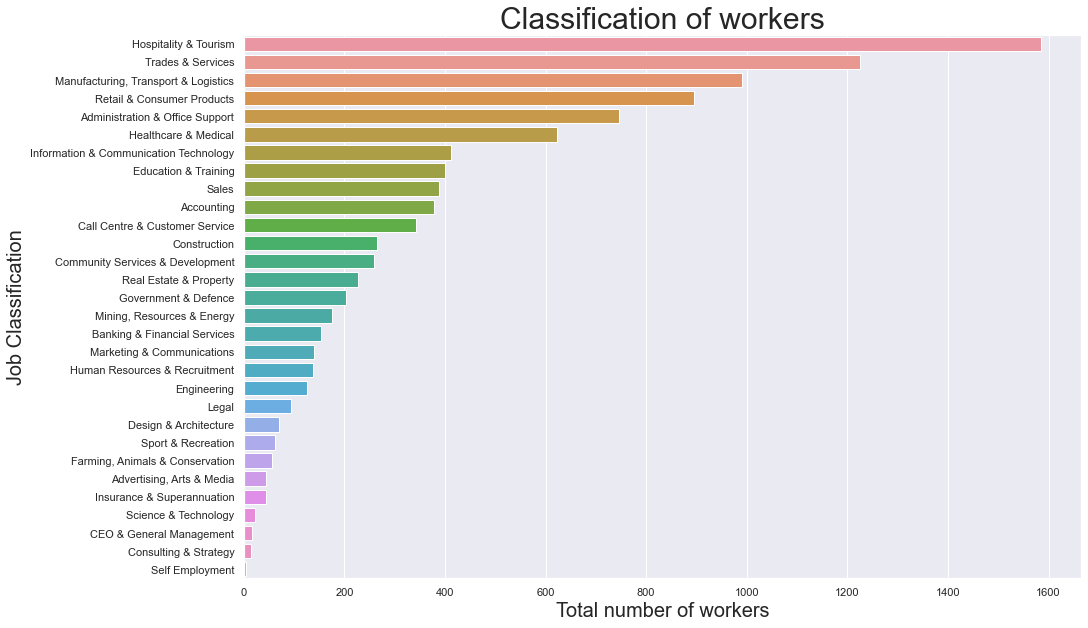

In [138]:
sns.set(rc = {'figure.figsize':(15,10)})
class_plot = sns.countplot(y = df.Classification, order = df.Classification.value_counts().index)
class_plot.set_xlabel("Total number of workers", fontsize = 20)
class_plot.set_ylabel("Job Classification", fontsize = 20)
class_plot.set_title('Classification of workers', fontsize = 30)

In [139]:
df["MeanSalary"]=(df.LowestSalary+df.HighestSalary)/2
df

Id                                              Title  \
0      37404348.0                           Casual Stock Replenisher   
1      37404337.0                           Casual Stock Replenisher   
2      37404356.0  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3      37404330.0                              Team member - Belrose   
4      37404308.0  Business Banking Contact Centre Specialist, Ni...   
...           ...                                                ...   
10094  37388912.0                                Executive Assistant   
10095  37388903.0                   Payroll Officer - Neller Preceda   
10096  37388901.0                       Receptionist / Administrator   
10097  37388898.0          INTERNATIONAL WHOLESALE TRAVEL CONSULTANT   
10098  37388893.0                    Customer Service Representative   

                                              Company  \
0                                         Aldi Stores   
1                                         Aldi Stores   
2                                 LB Creative Pty Ltd   
3                              Anaconda Group Pty Ltd   
4      Commonwealth Bank - Business & Private Banking   
...                                               ...   
10094                              V/Line Corporation   
10095                      Hays Accountancy & Finance   
10096                     Randstad - Business Support   
10097                        AA Appointments Brisbane   
10098                                    Kennedy Reid   

                           Date                 Location  \
0      2018-10-07T00:00:00.000Z                   Sydney   
1      2018-10-07T00:00:00.000Z    Richmond & Hawkesbury   
2      2018-10-07T00:00:00.000Z                 Brisbane   
3      2018-10-07T00:00:00.000Z  Gosford & Central Coast   
4      2018-10-07T00:00:00.000Z                   Sydney   
...                         ...                      ...   
10094  2018-10-04T00:00:00.000Z                Melbourne   
10095  2018-10-04T00:00:00.000Z                Melbourne   
10096  2018-10-04T00:00:00.000Z                 Brisbane   
10097  2018-10-04T00:00:00.000Z                 Brisbane   
10098  2018-10-04T00:00:00.000Z                   Sydney   

                              Area                   Classification  \
0      North West & Hills District       Retail & Consumer Products   
1                              NaN       Retail & Consumer Products   
2              CBD & Inner Suburbs       Retail & Consumer Products   
3                              NaN       Retail & Consumer Products   
4            Ryde & Macquarie Park   Call Centre & Customer Service   
...                            ...                              ...   
10094          CBD & Inner Suburbs  Administration & Office Support   
10095          CBD & Inner Suburbs                       Accounting   
10096          CBD & Inner Suburbs  Administration & Office Support   
10097          CBD & Inner Suburbs            Hospitality & Tourism   
10098     South West & M5 Corridor   Call Centre & Customer Service   

               SubClassification  \
0              Retail Assistants   
1              Retail Assistants   
2              Retail Assistants   
3              Retail Assistants   
4                Sales - Inbound   
...                          ...   
10094       PA, EA & Secretarial   
10095                    Payroll   
10096  Administrative Assistants   
10097  Travel Agents/Consultants   
10098                      Other   

                                             Requirement  \
0      Our Casual Stock Replenishers pride themselves...   
1      Our Casual Stock Replenishers pride themselves...   
2      BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA   
3      Bring it on - do you love the great outdoors a...   
4      We are seeking highly articulate, enthusiastic...   
...                                                  ...   
10094  The Executive Assistant will pr

In [148]:
bins = pd.cut(df['MeanSalary'], [10,20, 30, 40, 50, 60])
SalaryRange = df.groupby(bins)['MeanSalary'].agg(['count', 'sum'])
SalaryRange["PercentOfTotal"]=(SalaryRange["count"]/len(df))*100
SalaryRange

count       sum  PercentOfTotal
MeanSalary                                 
(10, 20]     3894   58410.0       38.558273
(20, 30]        0       0.0        0.000000
(30, 40]     1842   64470.0       18.239430
(40, 50]     2519  113355.0       24.943064
(50, 60]     1844  101420.0       18.259234

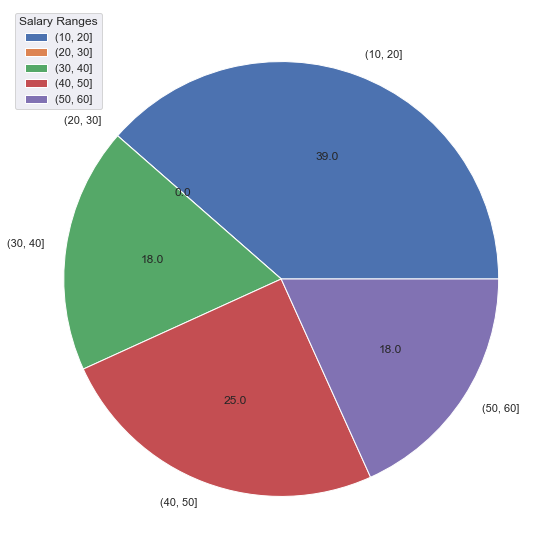

In [160]:
def absolute_value(val):
    a  = numpy.round(val/100.*SalaryRange.PercentOfTotal.sum(), 0)
    return a
plt.pie(SalaryRange.PercentOfTotal, labels=SalaryRange.index, autopct=absolute_value)
plt.legend(title = "Salary Ranges")

In [104]:
# Load the data using Pandas
winedf = pd.read_csv('wine.data.csv')

#TODO: Visualize the top 10 first Rows
winedf

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280  Proline  
0               5.64  1.04   3.92     1065  
1               4.38  1.05   3.40     1050  
2               5.68  1.03   3.17     1185  
3               7.80  0.86   3.45     1480  
4               4.32  1.04   2.93      735  
..               ...   ...    ...      ...  
173             7.70  0.64   1.74      740  
174             7.30  0.70   1.56      750  
175            10.20  0.59   1.56      835  
176             9.30  0.60   1.62      840  
177             9.20  0.61   1.60      560  

[178 rows x 14 columns]

In [105]:
#save label to new variable
winelabel = pd.DataFrame(winedf.Label)
winelabel

Label
0        1
1        1
2        1
3        1
4        1
..     ...
173      3
174      3
175      3
176      3
177      3

[178 rows x 1 columns]

In [106]:
winedf=winedf.drop("Label", axis=1)
winedf

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

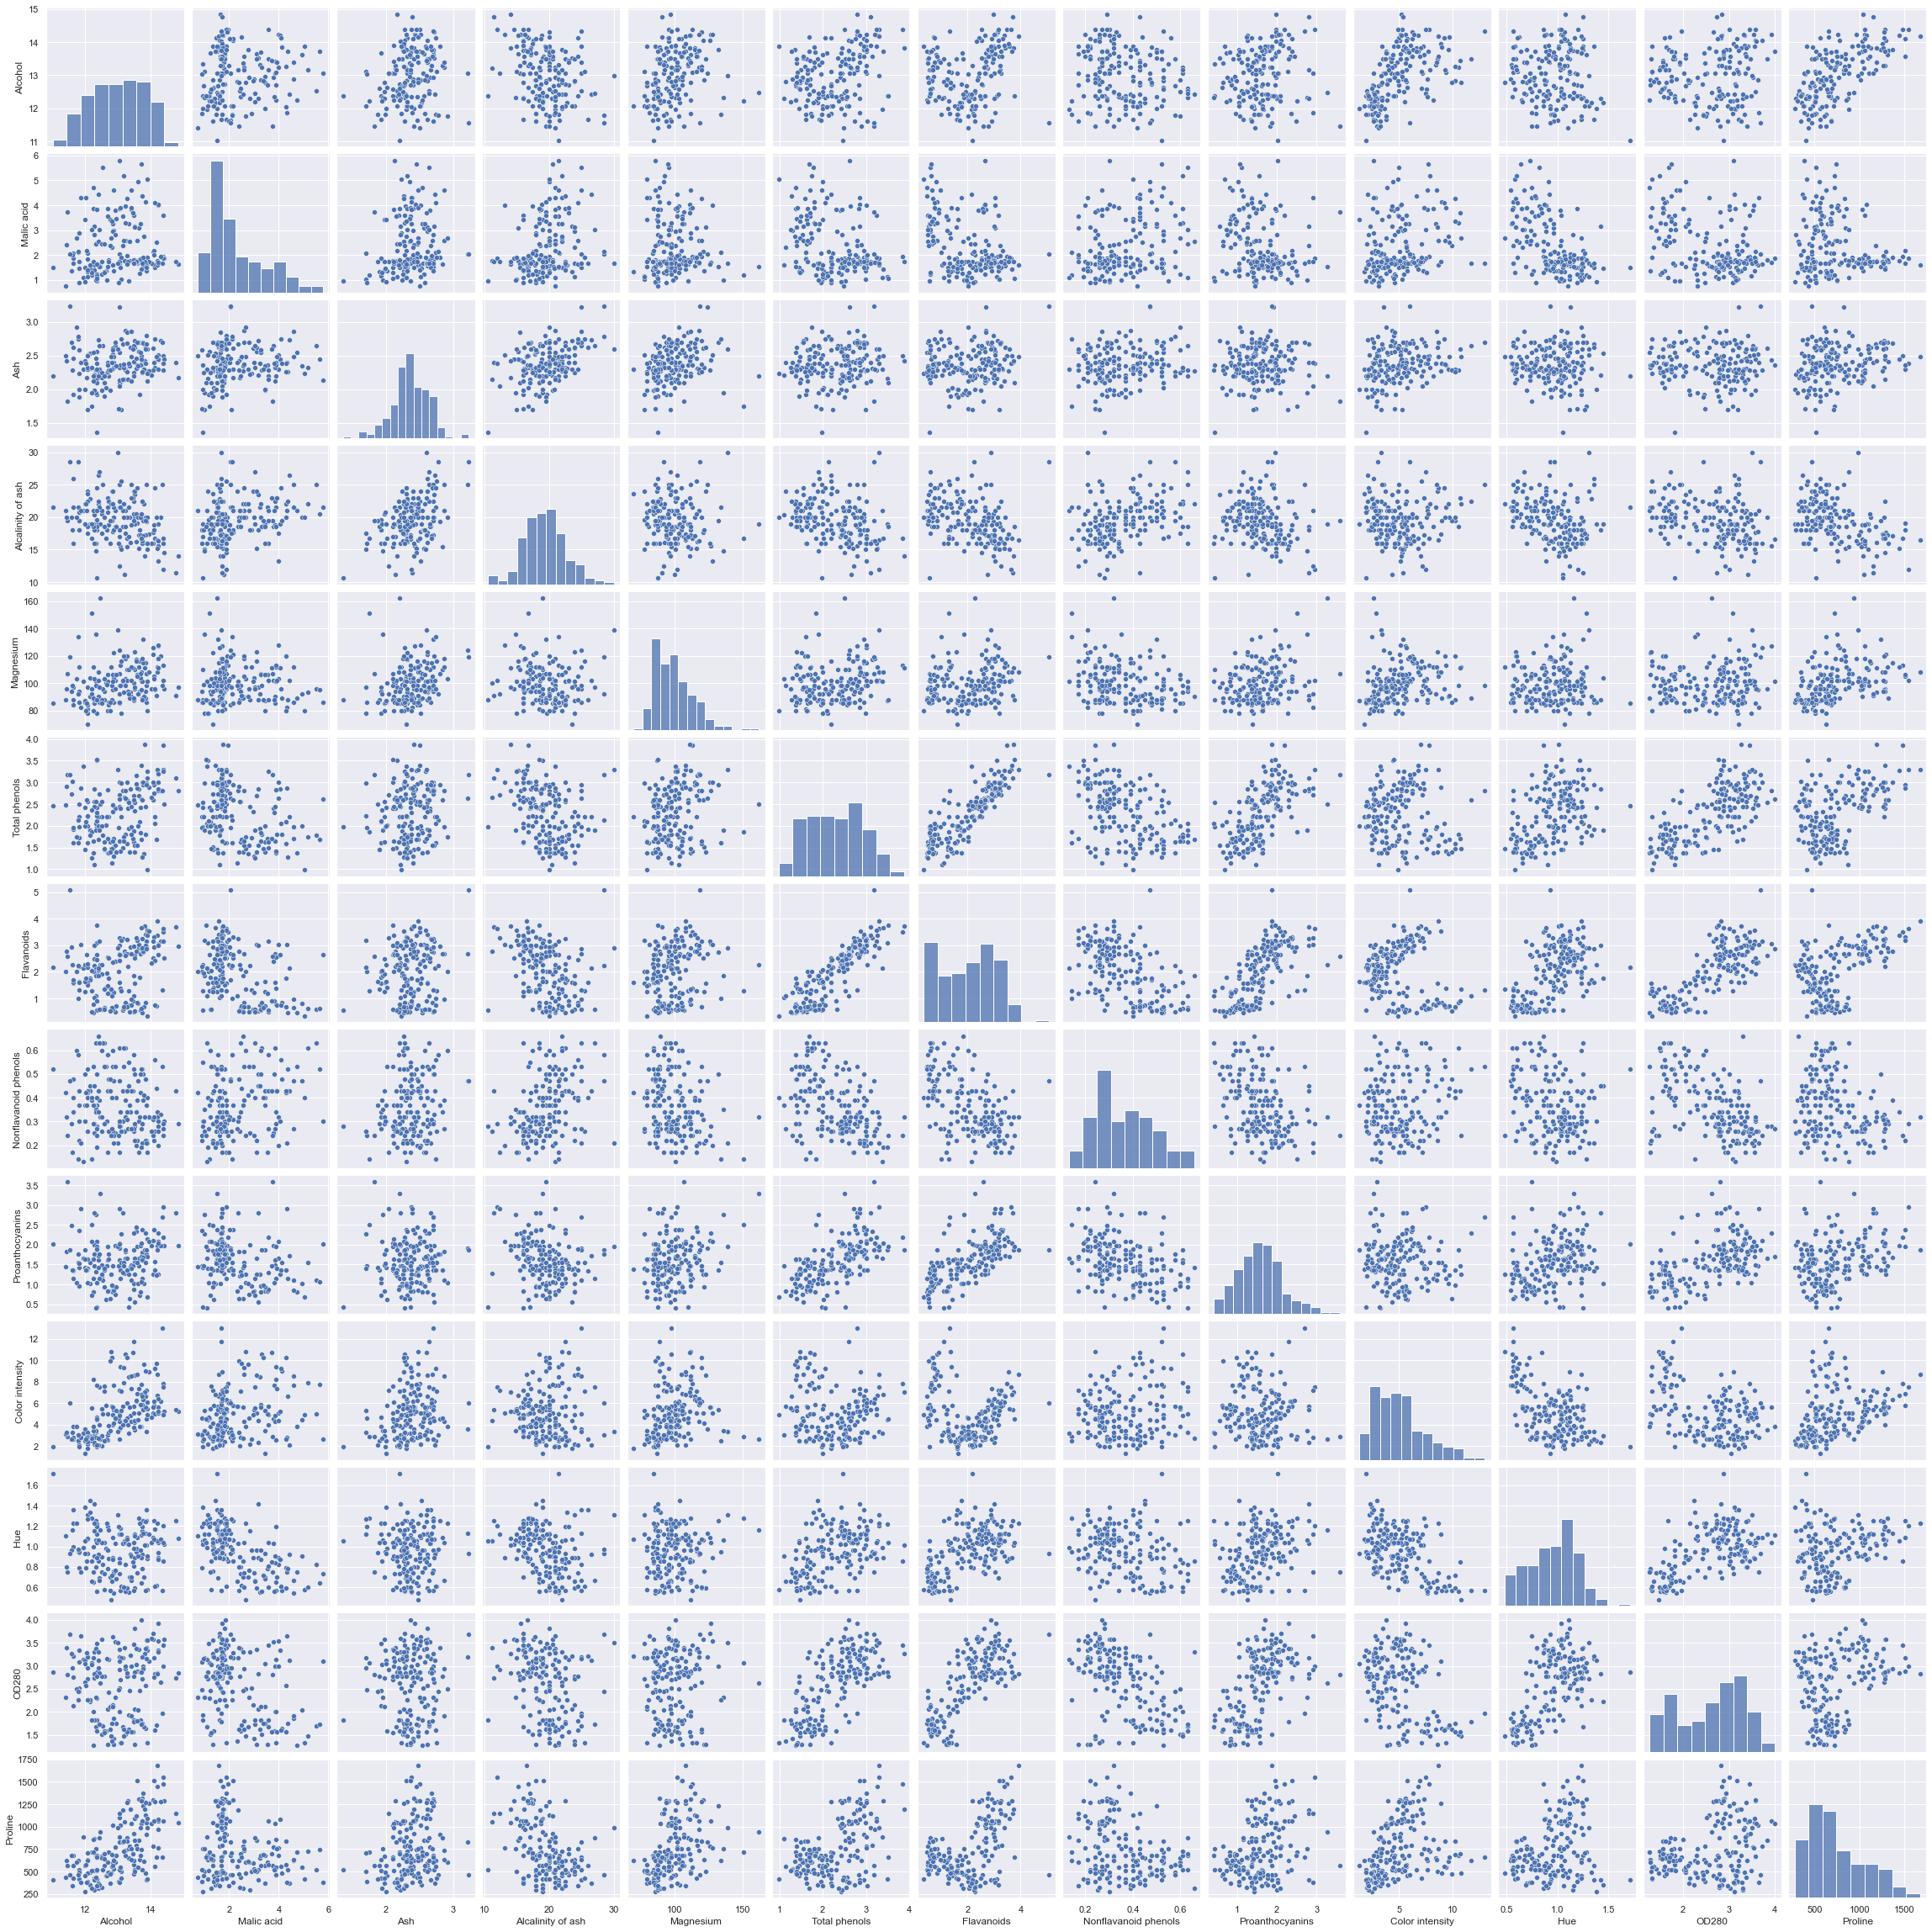

In [107]:
#sns_plot1=sns.pairplot(winedf)
sns_plot1

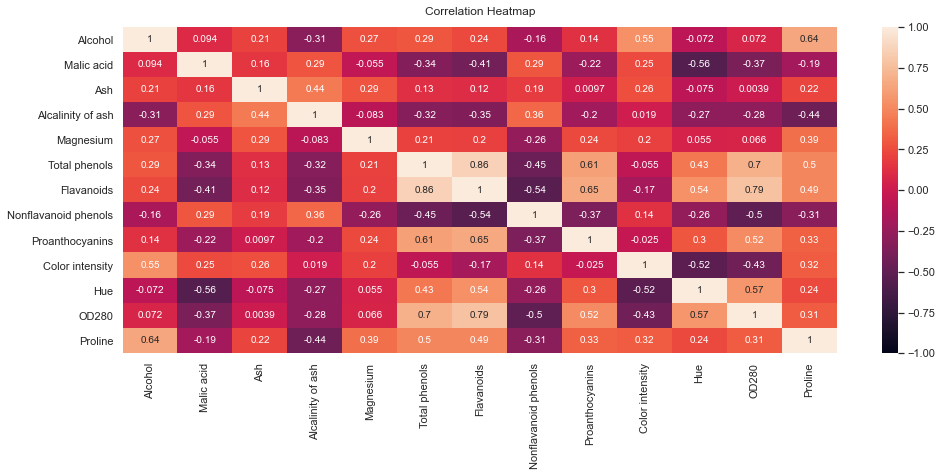

In [112]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(winedf.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#Top 3 correlations: Flavanoids & Total phenols, Flavanoids & OD280 and Total Phenols &OD280 

In [92]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
label_pred_KM = kMeansClustering.fit_predict(winedf)
winedf["cluster"]=label_pred_KM.astype('float64')
winedf

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
0     3.92     1065      1.0  
1     3.40     1050      1.0  
2     3.17     1185      1.0  
3     3.45     1480      1.0  
4     2.93      735      0.0  
..     ...      ...      ...  
173   1.74      740      0.0  
174   1.56      750      0.0  
175   1.56      835      0.0  
176   1.62      840      0.0  
177   1.60      560      2.0  

[178 rows x 14 columns]

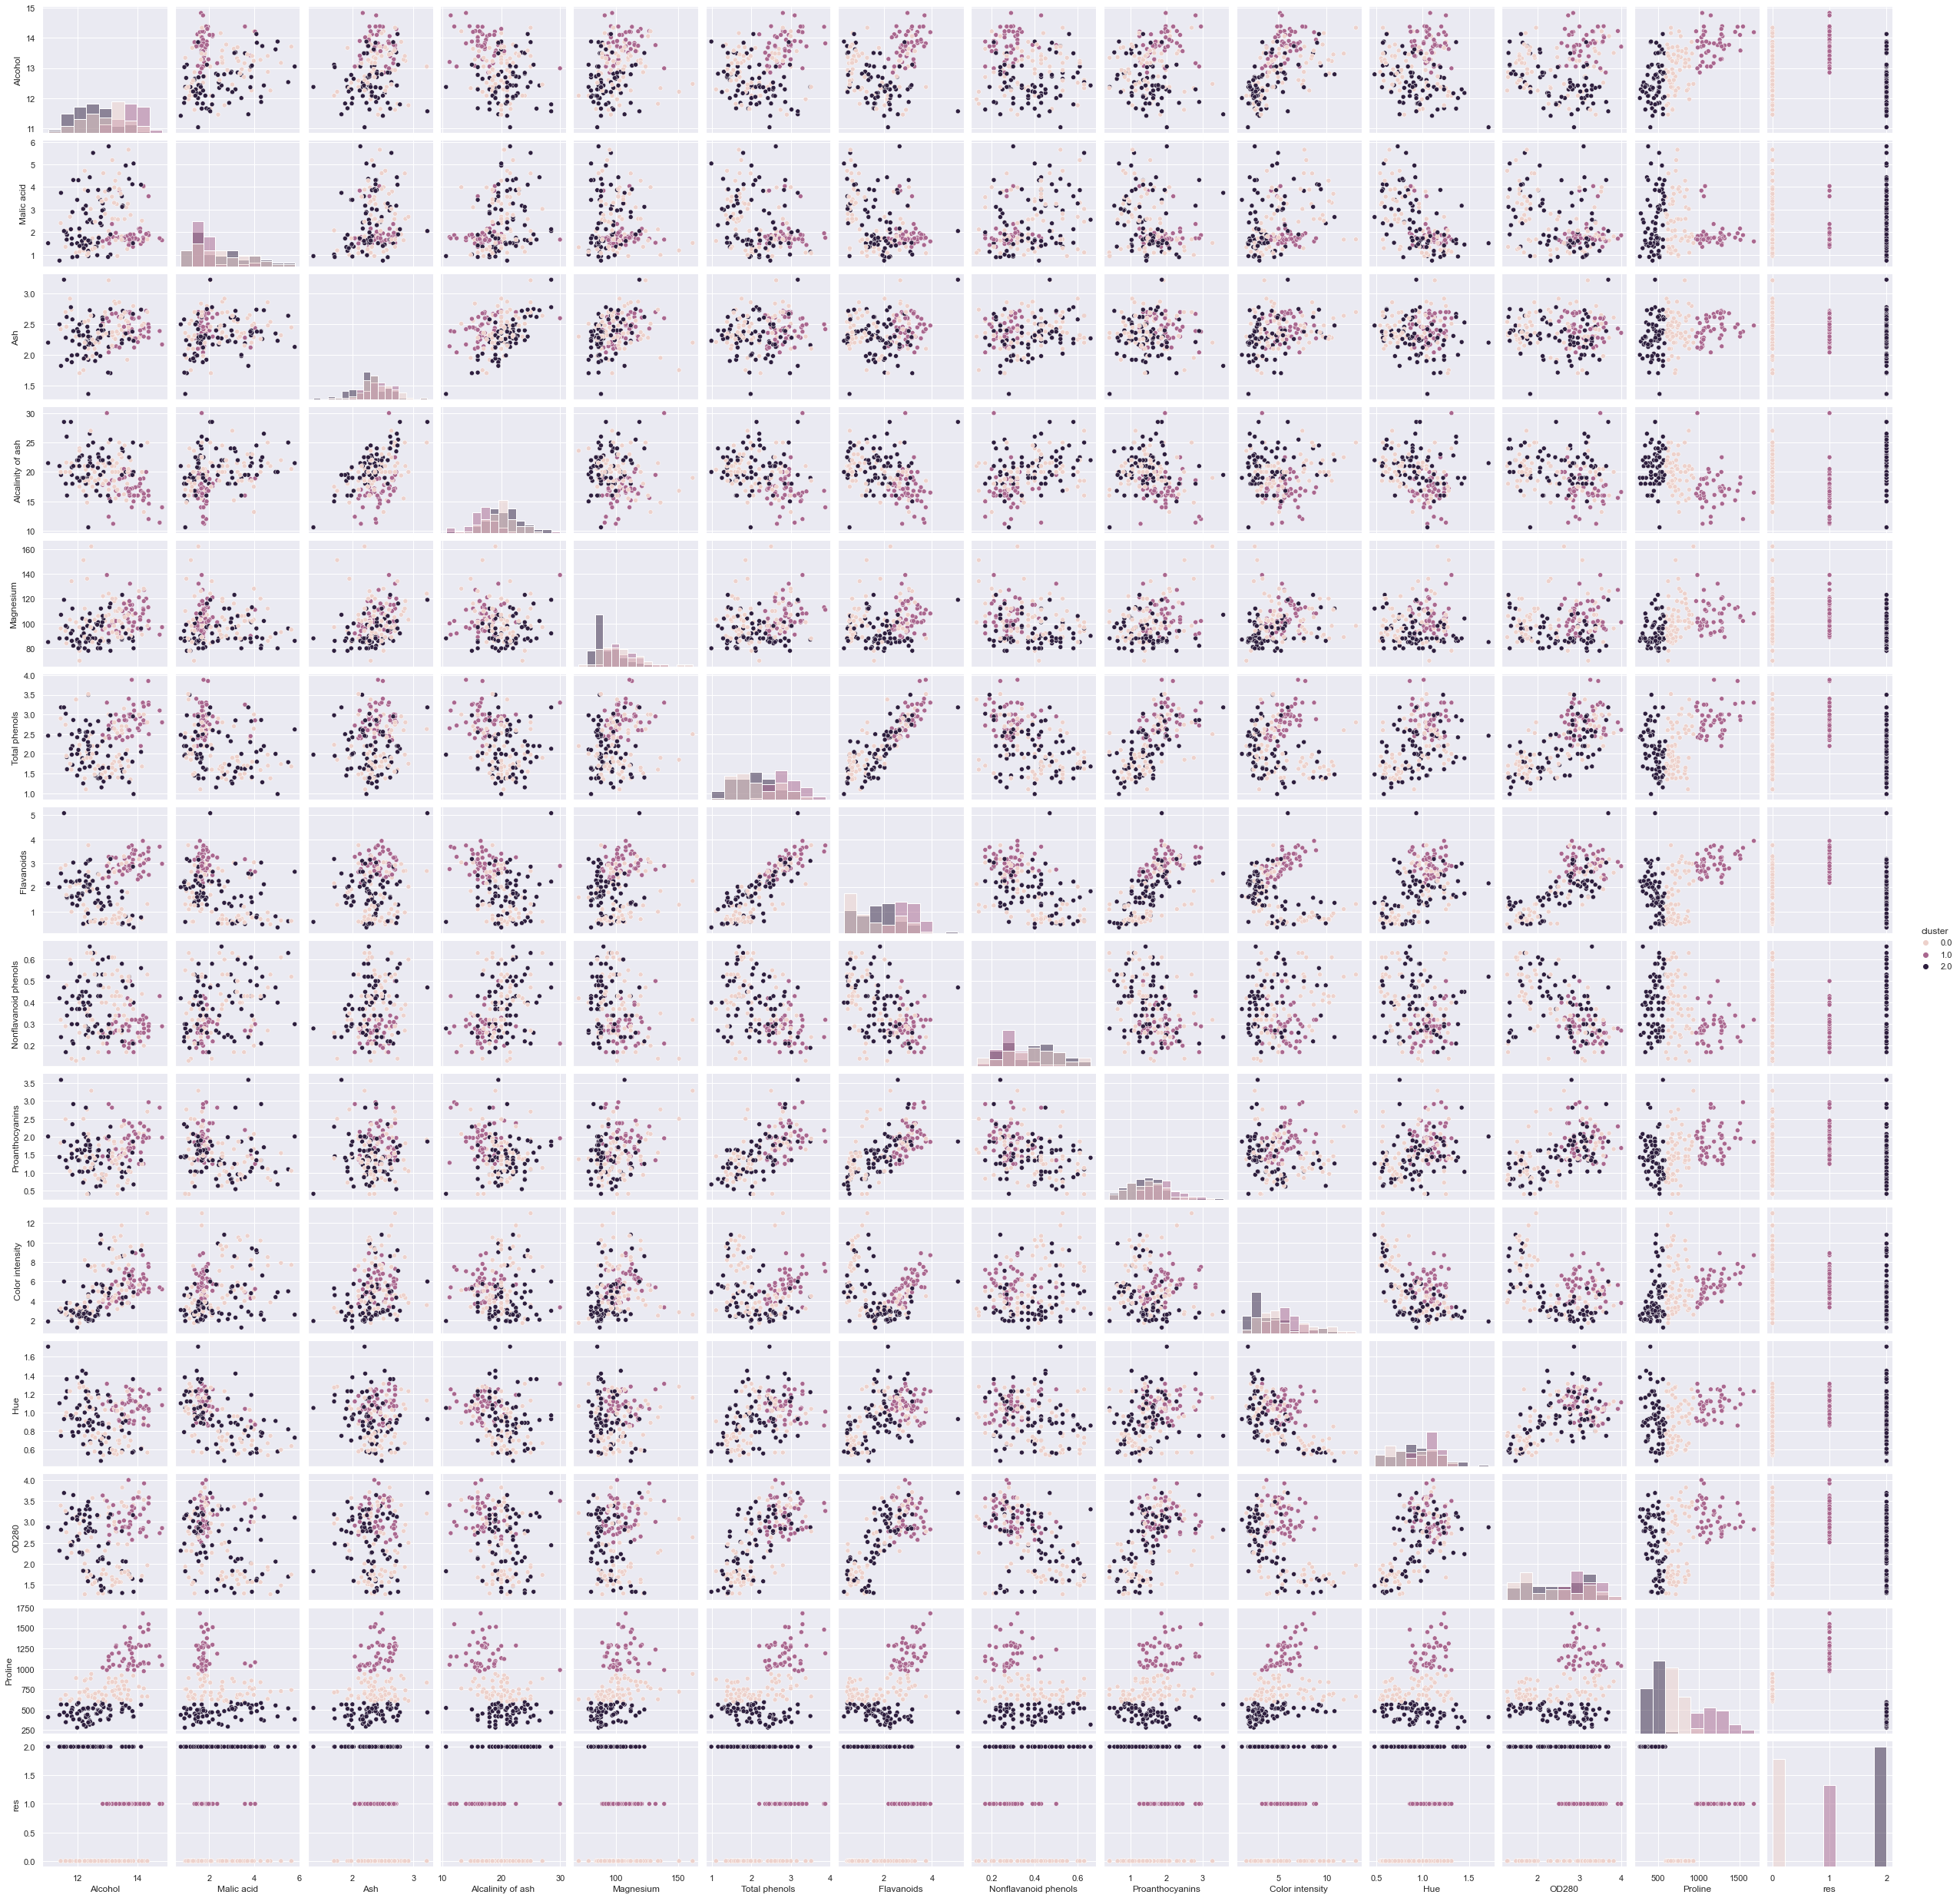

In [89]:
sns_plot2=sns.pairplot(winedf, hue = "cluster",diag_kind="hist")
sns_plot2

In [100]:
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(winedf)
X_scaled_array = standardScaler.transform(winedf)
normalizedData = pd.DataFrame(X_scaled_array, columns = winedf.columns)
normalizedData

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     Color intensity       Hue     OD280   Proline   cluster  
0           0.251717  0.362177  1.847920  1.013009 -0.045889  
1          -0.293321  0.406051  1.113449  0.965242 -0.045889  
2           0.269020  0.318304  0.788587  1.395148 -0.045889  
3           1.186068 -0.427544  1.184071  2.334574 -0.045889  
4          -0.319276  0.362177  0.449601 -0.037874 -1.212782  
..               ...       ...       ...       ...       ...  
173         1.142811 -1.392758 -1.231206 -0.021952 -1.212782  
174         0.969783 -1.129518 -1.485445  0.009893 -1.212782  
175         2.224236 -1.612125 -1.485445  0.280575 -1.212782  
176         1.834923 -1.568252 -1.400699  0.296498 -1.212782  
177         1.791666 -1.524378 -1.428948 -0.595160  1.121004  

[178 rows x 14 columns]

In [101]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
label_pred_KM = kMeansClustering.fit_predict(normalizedData)
normalizedData["cluster"]=label_pred_KM.astype('float64')
normalizedData

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     Color intensity       Hue     OD280   Proline  cluster  
0           0.251717  0.362177  1.847920  1.013009      2.0  
1          -0.293321  0.406051  1.113449  0.965242      2.0  
2           0.269020  0.318304  0.788587  1.395148      2.0  
3           1.186068 -0.427544  1.184071  2.334574      2.0  
4          -0.319276  0.362177  0.449601 -0.037874      2.0  
..               ...       ...       ...       ...      ...  
173         1.142811 -1.392758 -1.231206 -0.021952      0.0  
174         0.969783 -1.129518 -1.485445  0.009893      0.0  
175         2.224236 -1.612125 -1.485445  0.280575      0.0  
176         1.834923 -1.568252 -1.400699  0.296498      0.0  
177         1.791666 -1.524378 -1.428948 -0.595160      0.0  

[178 rows x 14 columns]

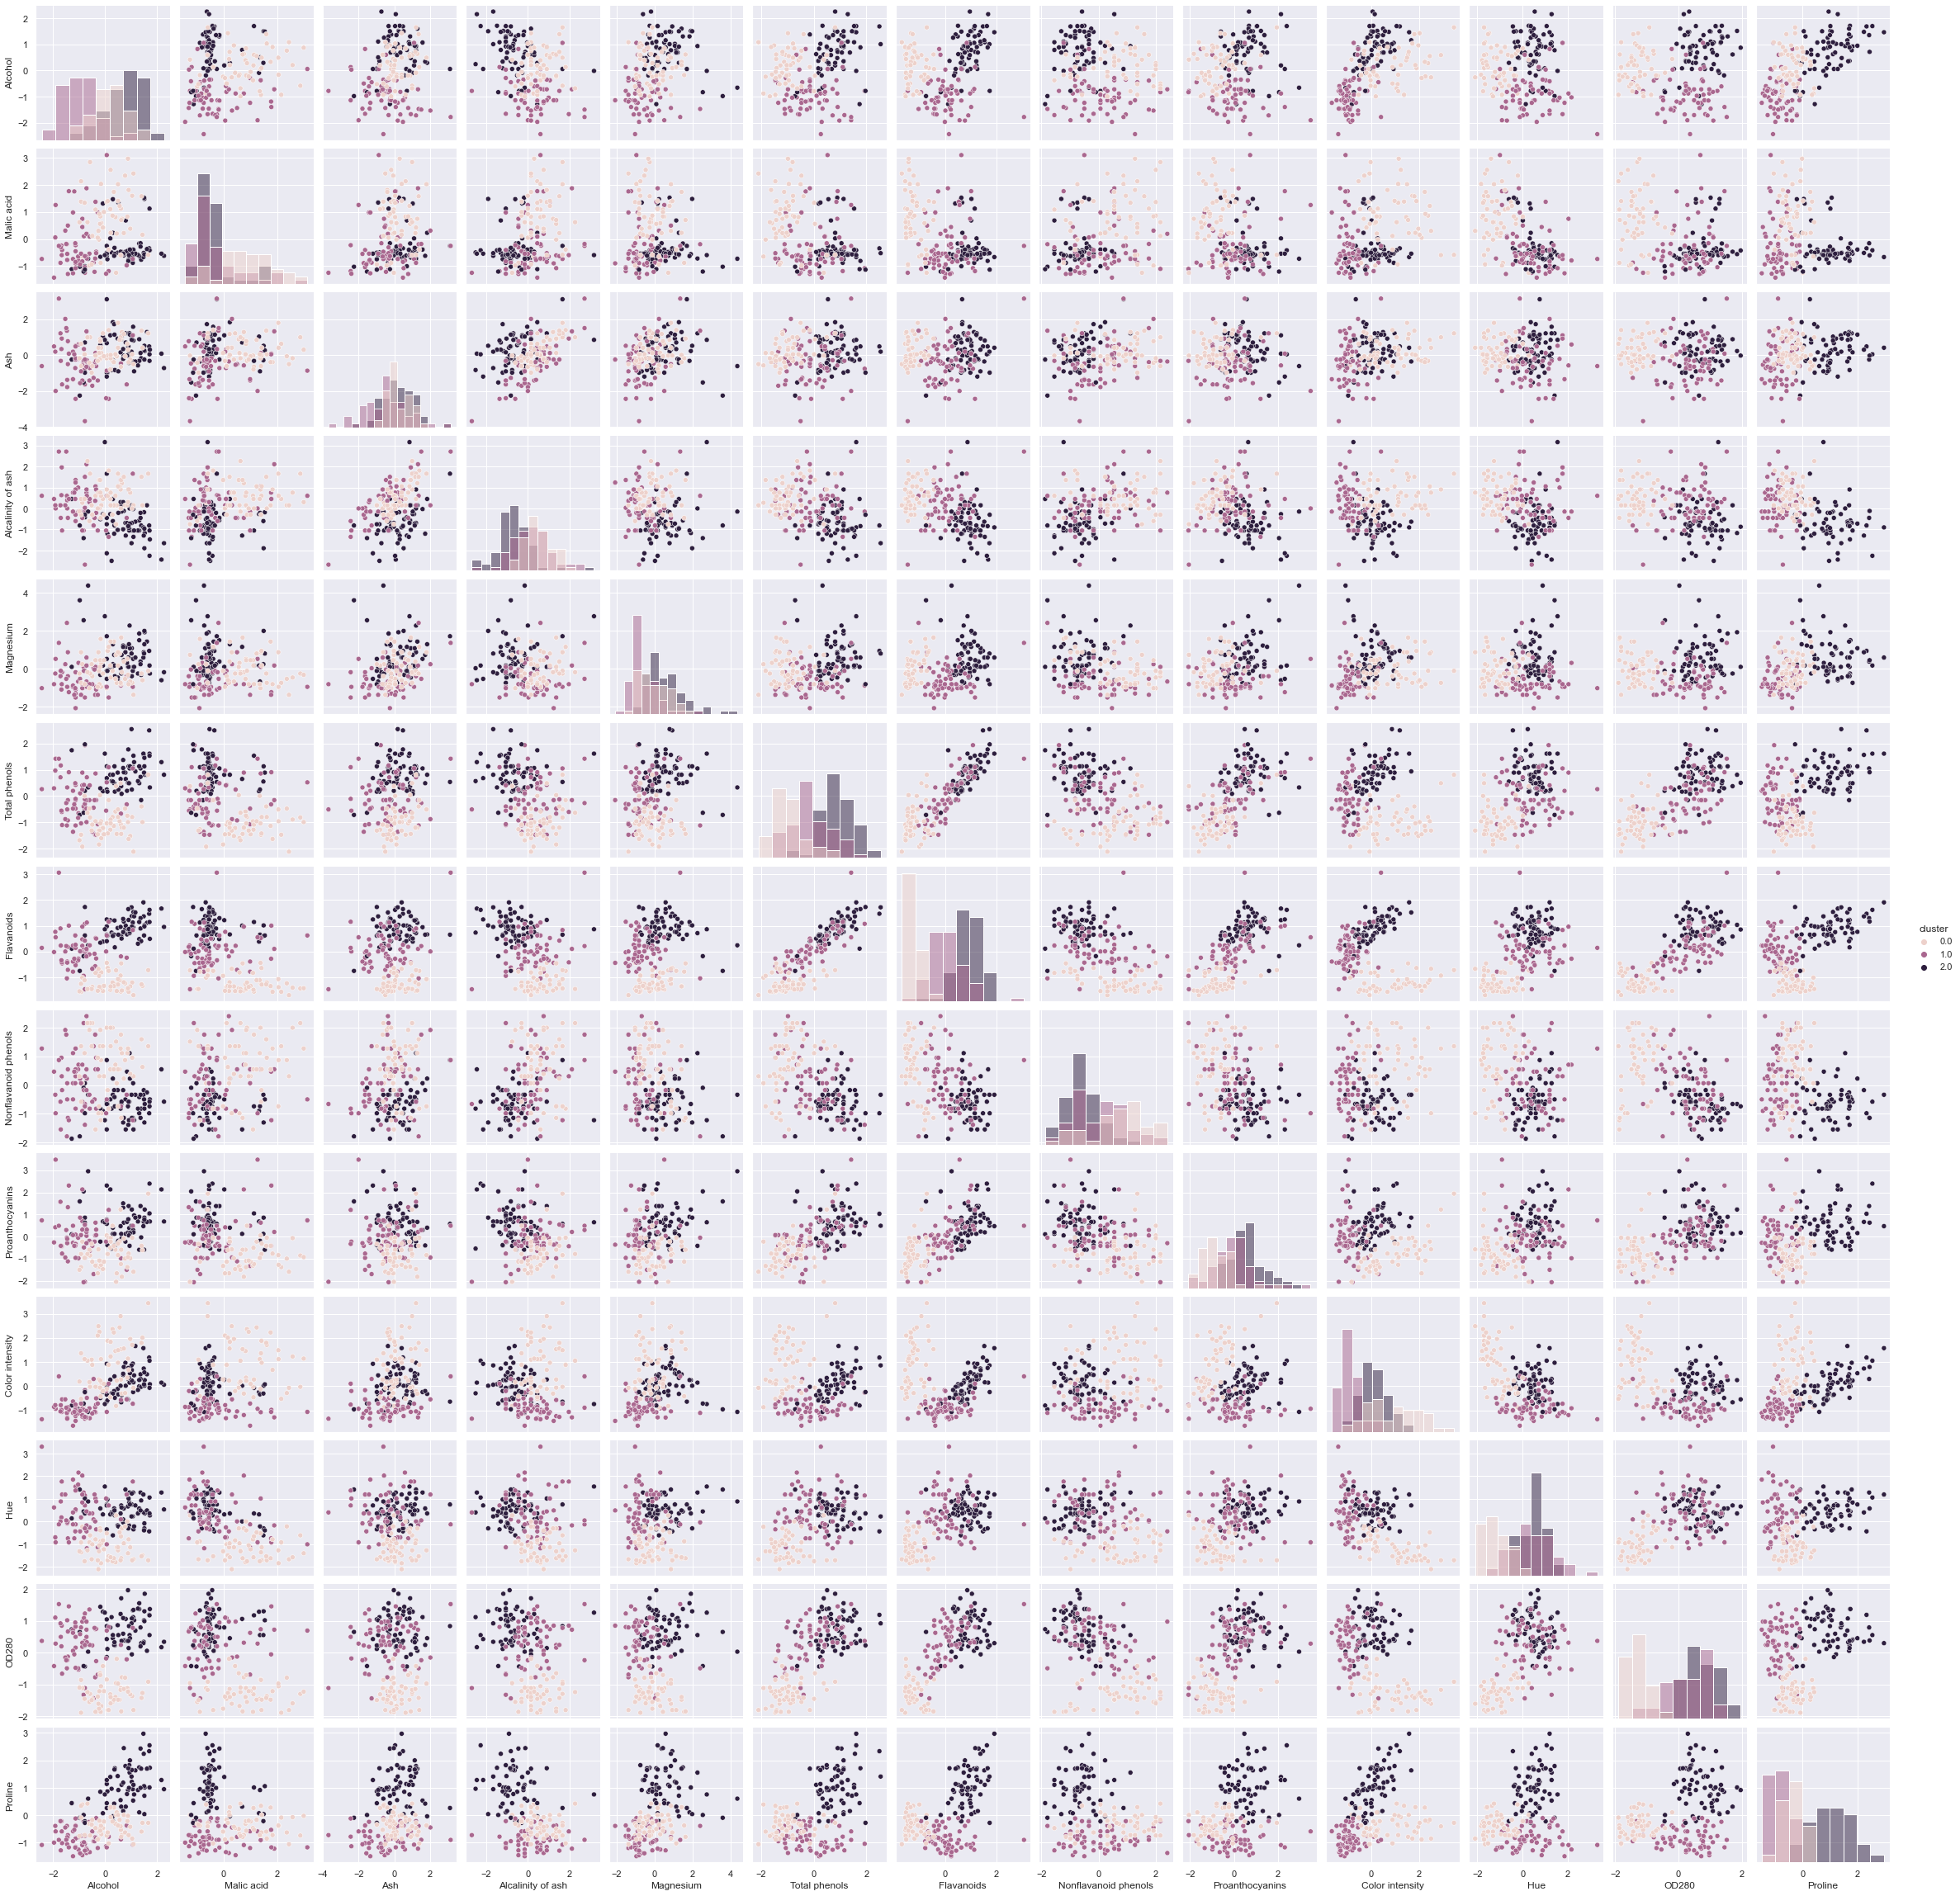

In [102]:
sns_plot3=sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")
sns_plot3